In [0]:
# This notebook loads the log normalised data, use the filtering criteria (number of counts > 500 and std > 1) to select
# the genes that will be used to train the CNN

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [3]:
# Load log normalised data
df = pd.read_csv('/output/TransformedData_DerivedData/norm_count_log.csv')

In [4]:
df.head()

,gene,SLX-18061 UDI0001 MCF7 SUMO3 m16 B,SLX-18061 UDI0002 MCF7 NCOA3 NCOA3-2 E,SLX-18061 UDI0003 MCF7 SUMO1 21m1 D,SLX-18061 UDI0004 MCF7 TFAP2C 31a A,SLX-18061 UDI0005 MCF7 CREBBP 28gr3 A,SLX-18061 UDI0006 MCF7 NRIP1 5c D,SLX-18061 UDI0007 MCF7 CTRL Renilla D,SLX-18061 UDI0008 MCF7 GRHL2 37b B,SLX-18061 UDI0009 MCF7 NCOA3 1dr2 D,...,SLX-17619 UDI0068 T47D NR2F2 17ar3 C,SLX-17619 UDI0070 T47D DPF2 27a D,SLX-17619 UDI0071 T47D SUMO1 21m1 C,SLX-17619 UDI0072 T47D CTRL Renilla B,SLX-17619 UDI0073 T47D ZMIZ1 19ar3 C,SLX-17619 UDI0074 T47D SUMO2 35m C,SLX-17619 UDI0075 T47D CREBBP 34a E,SLX-17619 UDI0076 T47D GRHL2 37b B,SLX-17619 UDI0077 T47D RARA 7b E,SLX-17619 UDI0078 T47D NRIP1 5c C
0,DDX11L1,0.748025,0.492895,0.656977,0.833001,0.705027,0.927948,0.533450,0.835987,0.704080,...,0.263434,0.112948,0.362438,0.086554,0.130170,0.580177,0.145973,0.080476,0.210546,0.606465
1,WASH7P,4.703836,5.071529,4.518375,4.416651,4.895447,4.780066,4.703413,4.776283,4.741381,...,5.077000,4.980905,4.388477,5.152328,4.985832,4.728829,4.868702,4.959652,5.133249,5.195830
2,LOC729737,5.128237,5.079274,4.817856,4.455029,5.048494,5.028571,5.151300,4.995813,5.416189,...,5.018757,5.006716,3.229204,5.090837,4.047232,3.549757,3.097584,3.537646,5.220953,5.084023
3,LOC102725121,0.355908,0.183652,0.253697,0.269785,0.443713,0.633729,0.291242,0.695814,0.292406,...,0.263434,0.217693,0.192571,0.086554,0.066552,0.344849,0.000000,0.080476,0.210546,0.487427
4,WASH9P,5.106642,5.373478,4.944860,4.765378,5.165296,5.095691,5.074845,5.187944,5.113210,...,5.473745,5.357028,4.782036,5.582850,5.370359,5.081177,5.200699,5.243620,5.523261,5.608540


In [5]:
df.shape

(17064, 440)

In [6]:
# Just some housekeeping
# Check for NaNs
print(df.isnull().values.any())
# check datatzpes
df.dtypes

False


gene                                       object
SLX-18061 UDI0001 MCF7 SUMO3 m16 B        float64
SLX-18061 UDI0002 MCF7 NCOA3 NCOA3-2 E    float64
SLX-18061 UDI0003 MCF7 SUMO1 21m1 D       float64
SLX-18061 UDI0004 MCF7 TFAP2C 31a A       float64
                                           ...   
SLX-17619 UDI0074 T47D SUMO2 35m C        float64
SLX-17619 UDI0075 T47D CREBBP 34a E       float64
SLX-17619 UDI0076 T47D GRHL2 37b B        float64
SLX-17619 UDI0077 T47D RARA 7b E          float64
SLX-17619 UDI0078 T47D NRIP1 5c C         float64
Length: 440, dtype: object

# Clean the dataset

In [7]:
# Remove rows that don't add to 500 hundred (genes that are expressed around 1 or 0 across all samples)
df['sum'] = df.sum(axis=1)
df = df[df['sum'] > 500]
# drop sum column
df = df.drop(columns=['sum'])
print(f'New shape: {df.shape}')

New shape: (13272, 440)


In [8]:
# Remove rows with low variance (below 2)
df['variance'] = df.std(axis=1)
df = df[df['variance'] > 1.0]
df = df.drop(columns=['variance'])
print(f'New shape: {df.shape}')

New shape: (1300, 440)


In [9]:
# Get the name of the genes that we are interested on
print(f'Number of genes that survived: {len(df)}')
df['gene'].to_csv('/output/TransformedData_DerivedData/CNN/histogram/gene_list_cnn.csv',  header=None, index=None, sep=' ', mode='a')

Number of genes that survived: 1300


In [11]:
# Save cleaned file
csv_path = '/output/TransformedData_DerivedData/CNN/histogram/cleaned_cnn_data.csv'
hdf5_path = '/output/TransformedData_DerivedData/CNN/histogram/cleaned_cnn_data.h5'
df.to_hdf(hdf5_path, 'data', mode='w', format='table')
df.to_csv(csv_path)

In [12]:
df.head(5)

,gene,SLX-18061 UDI0001 MCF7 SUMO3 m16 B,SLX-18061 UDI0002 MCF7 NCOA3 NCOA3-2 E,SLX-18061 UDI0003 MCF7 SUMO1 21m1 D,SLX-18061 UDI0004 MCF7 TFAP2C 31a A,SLX-18061 UDI0005 MCF7 CREBBP 28gr3 A,SLX-18061 UDI0006 MCF7 NRIP1 5c D,SLX-18061 UDI0007 MCF7 CTRL Renilla D,SLX-18061 UDI0008 MCF7 GRHL2 37b B,SLX-18061 UDI0009 MCF7 NCOA3 1dr2 D,...,SLX-17619 UDI0068 T47D NR2F2 17ar3 C,SLX-17619 UDI0070 T47D DPF2 27a D,SLX-17619 UDI0071 T47D SUMO1 21m1 C,SLX-17619 UDI0072 T47D CTRL Renilla B,SLX-17619 UDI0073 T47D ZMIZ1 19ar3 C,SLX-17619 UDI0074 T47D SUMO2 35m C,SLX-17619 UDI0075 T47D CREBBP 34a E,SLX-17619 UDI0076 T47D GRHL2 37b B,SLX-17619 UDI0077 T47D RARA 7b E,SLX-17619 UDI0078 T47D NRIP1 5c C
37,MXRA8,1.286246,1.394550,1.138562,0.799304,1.204993,1.295217,1.200015,1.314706,1.552010,...,5.376217,5.328074,5.401519,5.558450,5.717042,4.463453,5.406653,5.594770,5.581228,5.031802
49,FNDC10,4.917345,5.465002,4.919880,4.763195,5.087215,4.859461,4.764054,4.950263,4.897437,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.002793,0.000000,0.000000,0.000000,0.056853
80,TP73-AS1,0.110952,0.000000,0.067728,0.000000,0.000000,0.000000,0.063142,0.000000,0.000000,...,4.172186,4.066768,3.920011,4.145220,4.169607,3.105260,4.287394,3.976658,4.356399,4.606017
145,FBXO2,2.213280,2.501040,2.109847,2.738841,1.922492,1.810293,1.772260,2.106211,2.097725,...,5.079851,5.167361,4.769502,4.858452,4.897184,4.100648,4.710488,5.295117,5.007344,5.051170
161,DHRS3,1.238166,2.316771,0.822961,1.077511,0.992968,2.861526,1.200015,1.215515,2.282294,...,3.106453,3.655883,4.020753,3.643923,4.478471,3.142499,4.066825,3.815532,4.400000,3.909559


In [13]:
import itertools

c = list(itertools.permutations(df['gene'],2))
print(f'Length of the combinations:{len(c)}')

Length of the combinations:1688700


## Analyse the correlation data

<AxesSubplot:>

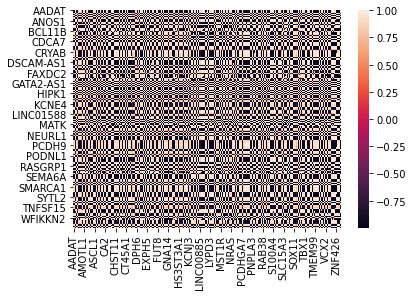

In [4]:
import pickle
import seaborn as sns
import numpy as np
from copy import deepcopy

# correlation network for the correlation group
with open('/output/TransformedData_DerivedData/CNN/histogram/thr_networks/corr_coeff_cnn_CREBBP.pkl', 'rb') as handle:
    crebp = pickle.load(handle)

sns.heatmap(crebp)

In [5]:
# Set a treshold 
thr = .95
# Binarize matrix using the above defined threshold
# 0: The correlation value was below the threshold
# 1: The correlation value was above the threshold
# 2: The correlation value was smaller than the -threshold
crebp_thr = deepcopy(
crebp)
crebp_thr[crebp_thr >= thr] = 1
crebp_thr[(crebp_thr > 0) & (crebp_thr < thr)] = 0
crebp_thr[crebp_thr <= -thr] = 2
crebp_thr[(crebp_thr < 0) & (crebp_thr > -thr)] = 0
# transform diagonal to NaN
crebp_thr.values[[np.arange(len(crebp_thr))]*2] = np.nan
crebp_thr

/projects/07e6ba69-8021-439f-901e-4d6226e5b28a/test/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


,AADAT,ABCA12,ABCC11,ABCC13,ABCC4,ABCC6,ABCC6P1,ABCC6P2,ABCG2,ABHD14B,...,ZNF704,ZNF714,ZNF716,ZNF717,ZNF727,ZNF75D,ZNF788P,ZNF844,ZNF880,ZNF883
AADAT,NaN,0.0,0.0,2.0,0.0,2.0,2.0,2.0,1.0,2.0,...,2.0,1.0,2.0,2.0,2.0,1.0,2.0,0.0,1.0,2.0
ABCA12,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
ABCC11,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ABCC13,2.0,0.0,0.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
ABCC4,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF75D,1.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,1.0,2.0,...,0.0,1.0,0.0,2.0,2.0,NaN,2.0,0.0,1.0,2.0
ZNF788P,2.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,1.0,...,1.0,2.0,0.0,1.0,1.0,2.0,NaN,0.0,2.0,1.0
ZNF844,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,2.0,1.0,1.0,0.0,0.0,0.0,NaN,0.0,1.0
ZNF880,1.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,1.0,2.0,...,2.0,1.0,2.0,2.0,2.0,1.0,2.0,0.0,NaN,2.0


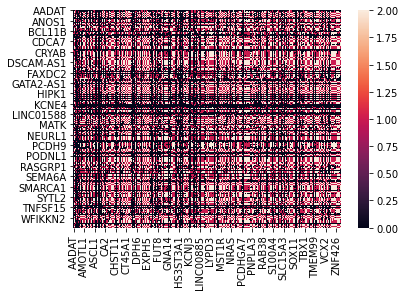

In [6]:
sns.heatmap(crebp_thr, cbar_kws=dict(ticks=[0, 1, 2]))
# save the threshold as a matrix
crebp_thr.to_csv('/output/TransformedData_DerivedData/CNN/histogram/thr_networks/corr_coeff_thr_CREBBP_matrix.csv')

In [14]:
crebp_conn_list = crebp_thr.stack().reset_index()
crebp_conn_list.rename(columns={'level_0': 'GeneA', 'level_1': 'GeneB', 0: 'interaction'}, inplace=True)
crebp_conn_list


,GeneA,GeneB,interaction
0,AADAT,ABCA12,0.0
1,AADAT,ABCC11,0.0
2,AADAT,ABCC13,2.0
3,AADAT,ABCC4,0.0
4,AADAT,ABCC6,2.0
...,...,...,...
1688695,ZNF883,ZNF727,1.0
1688696,ZNF883,ZNF75D,2.0
1688697,ZNF883,ZNF788P,1.0
1688698,ZNF883,ZNF844,1.0


In [15]:
crebp_conn_list['interaction'].value_counts()

0.0    732814
1.0    490206
2.0    465680
Name: interaction, dtype: int64

In [19]:
# save the thresholded data
crebp_conn_list.to_csv('/output/TransformedData_DerivedData/CNN/histogram/thr_networks/corr_coeff_thr_CREBBP.csv')

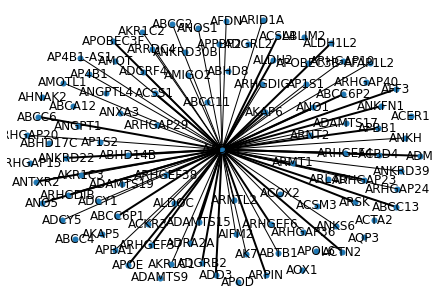

In [20]:
# tentatively visualise the data
import networkx as nx
G = nx.from_pandas_edgelist(crebp_conn_list.iloc[:100], source='GeneA', target='GeneB', edge_attr='interaction')
interaction = [i['interaction'] for i in dict(G.edges).values()]
nx.draw(G, with_labels=True, width=interaction, node_size=25)